# 2. Run the dimensionality reduction methods!

To save computational resources, we limit the number of PCs used to 20 for PCA and PCoA. This mirrors [plink's defaults](https://www.cog-genomics.org/plink/1.9/strat#pca).

In [3]:
import numpy as np
import os
PREFIX = os.path.join(os.environ["HOME"], "plink-182")
DATA_PREFIX = os.path.join(PREFIX, "data")
OUT_PREFIX = os.path.join(PREFIX, "dr_outputs")

## Define "method + hyperparameter combinations" to test

`method2hpsettings` is a dictionary that maps the dimensionality reduction method name (one of `"pca"`, `"pcoa"`, `"umap"`, or `"tsne"`) to a list of dictionaries defining the hyperparameter settings to try for that method. The total number of dictionaries within lists defines the number of different "method + hyperparameter combinations" to test.

In [2]:
method2hpsettings = {
    "pca": [{"whiten": False}, {"whiten": True}],
    "pcoa": [{"metric": "jaccard"}, {"metric": "bray-curtis"}, {"metric": "canberra"}],
    "umap": [{}],
    "tsne": [{}]
}

## Load genotype matrix
This is adapted from my PSET 2 part 1 solution.

In [3]:
genotypematrix = np.loadtxt(os.path.join(DATA_PREFIX, "chr_21_genotypes.tab")).T

## PCA
This is also adapted from my PSET 2 part 1 solution.

In [4]:
from sklearn.decomposition import PCA

for pca_hp_settings in method2hpsettings["pca"]:
    use_whitening = pca_hp_settings["whiten"]
    pca = PCA(whiten=use_whitening, n_components=20)
    sample_loadings = pca.fit_transform(genotypematrix)
    np.savetxt(
        os.path.join(OUT_PREFIX, "pca_sample_loadings_whiten{}.txt".format(use_whitening)),
        sample_loadings
    )

### Visualize PCA

This code was adapted from PS2, part 1. I streamlined the code a bit and added some code to make the colors consistent for each superpopulation, but _for the most part, we didn't write this code_.

**TODO** -- make this its own function, so it's easy to visualize all of the DR results

Populating the interactive namespace from numpy and matplotlib


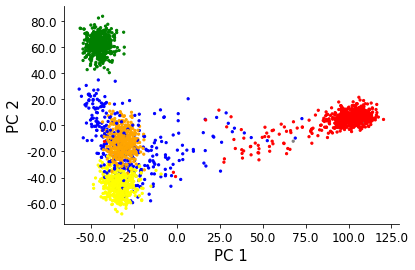

In [5]:
%pylab inline
    
####### Set up sample lists and color information #####
# Load population labels
sample_to_pop = {}
with open("/datasets/cs284s-sp20-public/ps2/ps2_reference_labels.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

### Determine colors for each population group ###
# As is documented on https://piazza.com/class/k87p6hvsod51q6?cid=20, the original colors for
# this PSET were somewhat misleading. Here, we ensure that all populations within a superpopulation
# are colored identically.

# This was taken from https://www.internationalgenome.org/category/population/
pop_metadata = """CHB	Han Chinese in Beijing, China	EAS
JPT	Japanese in Tokyo, Japan	EAS
CHS	Southern Han Chinese	EAS
CDX	Chinese Dai in Xishuangbanna, China	EAS
KHV	Kinh in Ho Chi Minh City, Vietnam	EAS
CEU	Utah Residents (CEPH) with Northern and Western European Ancestry	EUR
TSI	Toscani in Italia	EUR
FIN	Finnish in Finland	EUR
GBR	British in England and Scotland	EUR
IBS	Iberian Population in Spain	EUR
YRI	Yoruba in Ibadan, Nigeria	AFR
LWK	Luhya in Webuye, Kenya	AFR
GWD	Gambian in Western Divisions in the Gambia	AFR
MSL	Mende in Sierra Leone	AFR
ESN	Esan in Nigeria	AFR
ASW	Americans of African Ancestry in SW USA	AFR
ACB	African Caribbeans in Barbados	AFR
MXL	Mexican Ancestry from Los Angeles USA	AMR
PUR	Puerto Ricans from Puerto Rico	AMR
CLM	Colombians from Medellin, Colombia	AMR
PEL	Peruvians from Lima, Peru	AMR
GIH	Gujarati Indian from Houston, Texas	SAS
PJL	Punjabi from Lahore, Pakistan	SAS
BEB	Bengali from Bangladesh	SAS
STU	Sri Lankan Tamil from the UK	SAS
ITU	Indian Telugu from the UK	SAS"""

# These are *roughly* the same colors as were used for this PSET (i.e. AFR samples are red, EAS samples
# are green, EUR samples are yellow, SAS samples are orange)
superpop_to_color = {
    "AFR": "red", "EAS": "green", "EUR": "yellow", "SAS": "orange", "AMR": "blue", "None": "gray"
}
pop_to_superpop = {"None": "None"}
for line in pop_metadata.split("\n"):
    split_line = line.strip().split("\t")
    pop_to_superpop[split_line[0]] = split_line[2]

# Load samples list and get populations, then superpopulations, then colors
samples = [item.strip() for item in open(os.path.join(DATA_PREFIX, "sample_ids.txt"), "r").readlines()]
colors = []
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    color = superpop_to_color[pop_to_superpop[pop]]
    colors.append(color)

####### Load data #####
# Load PCs (TODO visualize both whiten true and false)
sample_loadings = np.loadtxt(os.path.join(OUT_PREFIX, "pca_sample_loadings_whitenFalse.txt"))
pc1 = sample_loadings[:, 0]
pc2 = sample_loadings[:, 1]

# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pc1, pc2, color=colors, s=5)
# Formatting tweaks
ax.set_xlabel("PC 1", size=15)
ax.set_ylabel("PC 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();

## PCoA

In [4]:
# TODO see http://scikit-bio.org/docs/latest/diversity.html#module-skbio.diversity
# for details on doing this: use skbio.diversity.beta_diversity()
# REMEMBER TO USE # PCs = 20!

for poca_hp_settings in method2hpsettings["pcoa"]:
    pass

['unweighted_unifrac', 'weighted_unifrac']


## UMAP

In [ ]:
# Run UMAP
for poca_hp_settings in method2hpsettings["pcoa"]:
    pass

## t-SNE

In [ ]:
# Run t-SNE
for poca_hp_settings in method2hpsettings["pcoa"]:
    pass